<h1>Neural Networks</h1>

<h3>Part 1: Load all the required libraries</h3>

In [3]:
#install the required libraries
#install.packages('NeuralNetTools')
#install.packages('nnet')
#install.packages('RColorBrewer')


#load the required libraries
library(NeuralNetTools)
library(nnet)
library(RColorBrewer)
library(caret)

Loading required package: lattice


Loading required package: ggplot2


<h3>Part 2: Read and prepare the dataset</h3>

In [4]:


#read the dataset
data <- read.delim("data.csv",header=T,sep=',')

#remove the NA column
data <- subset( #this function is used to subset a dataset
  data, #give it the data you want to subset
  select=-X #give it the feature that you want to include or exclude. - means exclude
  )

#remove the id column
data <- subset(
  data,
  select=-id
  )

#change the label to factor and move it to last column
diagnosis <- as.factor(data$diagnosis)
data <- subset(
  data,
  select=-diagnosis
  )
data$diagnosis <- diagnosis

head(data)

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 17.99 10.38 122.80 1001.0 0.11840 0.27760 0.3001 0.14710 0.2419 0.07871 ⋯ 17.33 184.60 2019.0 0.1622 0.6656 0.7119 0.2654 0.4601 0.11890 M 
 20.57 17.77 132.90 1326.0 0.08474 0.07864 0.0869 0.07017 0.1812 0.05667 ⋯ 23.41 158.80 1956.0 0.1238 0.1866 0.2416 0.1860 0.2750 0.08902 M 
 19.69 21.25 130.00 1203.0 0.10960 0.15990 0.1974 0.12790 0.2069 0.05999 ⋯ 25.53 152.50 1709.0 0.1444 0.4245 0.4504 0.2430 0.3613 0.08758 M 
 11.42 20.38 77.58 386.1 0.14250 0.28390 0.2414 0.10520 0.2597 0.09744 ⋯ 26.50 98.87 567.7 0.2098 0.8663 0.6869 0.2575 0.6638 0.17300 M 
 20.29 14.34 135.10 1297.0 0.10030 0.13280 0.1980 0.10430 0.1809 0.05883 ⋯ 16.67 152.20 1575.0 0.1374 0.2050 0.4000 0.1625 0.2364 0.07678 M 
 12.45 15.70 82.57 477.1 0.12780 0.17000 0.1578 0.08089 0.2087 0.07613 ⋯ 23.75 103.40 741.6 0.1791 0.5249 0.5355 0.1741 0.3985 0.12440 M

<h3>Part 3: Prepare the train and test data</h3>

In [5]:
#set seed for reproducible results
set.seed(1234)

#split to train and test
idx <- sample.int( #this function generates a random set of integer numbers
  nrow(data), #the numbers you want to sample from
  nrow(data) * 0.7 #the numbers you want to sample
  )

train <- data[idx, ]  # keep the 70% sample. we will use this as a training set 
test  <- data[-idx, ] # discard the 70% sample, this leaves us with the rest 30% test set

#let's check the new dimensions of the train and test sets
dim(train)
dim(test)

# for neural networks standardizing the inputs can decrease training time as well as the chance that the algorithm finds a local minimum when optimizing.

# standardize inputs: transform on the train set and use calculations on the test set
scaled_mat <- scale(
    train[,1:30], 
    center = TRUE, 
    scale = TRUE
    )
train_scaled <- data.frame(scaled_mat)
train_scaled$diagnosis <- as.factor(train$diagnosis)
head(train)
head(train_scaled)

test_scaled <- data.frame( scale(
    test[,1:30], 
    center = attributes(scaled_mat)$'scaled:center', 
    scale = attributes(scaled_mat)$'scaled:scale'
    ))
test_scaled$diagnosis <- as.factor(test$diagnosis)
head(test)
head(test_scaled)

398 
 31

171 
 31

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 65 12.68 23.84 82.69 499.0 0.11220 0.12620 0.11280 0.06873 0.1905 0.06590 ⋯ 33.47 111.80 888.3 0.1851 0.4061 0.40240 0.17160 0.3383 0.10310 M 
 354 15.08 25.74 98.00 716.6 0.10240 0.09769 0.12350 0.06553 0.1647 0.06464 ⋯ 33.22 121.20 1050.0 0.1660 0.2356 0.40290 0.15260 0.2654 0.09438 M 
 346 10.26 14.71 66.20 321.6 0.09882 0.09159 0.03581 0.02037 0.1633 0.07005 ⋯ 19.48 70.89 357.1 0.1360 0.1636 0.07162 0.04074 0.2434 0.08488 B 
 353 25.73 17.46 174.20 2010.0 0.11490 0.23630 0.33680 0.19130 0.1956 0.06121 ⋯ 23.58 229.30 3234.0 0.1530 0.5937 0.64510 0.27560 0.3690 0.08815 M 
 487 14.64 16.85 94.21 666.0 0.08641 0.06698 0.05192 0.02791 0.1409 0.05355 ⋯ 25.44 106.00 831.0 0.1142 0.2070 0.24370 0.07828 0.2455 0.06596 B 
 362 13.30 21.57 85.24 546.1 0.08582 0.06373 0.03344 0.02424 0.1815 0.05696 ⋯ 29.20 92.94 621.2 0.1140 0.1667 0.12120 0.05614 0.2637 0.06658 B

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 65 -0.3836444 1.1363172 -0.3520389 -0.42387081 1.2386018 0.48123664 0.3971650 0.5818528 0.41680306 0.4648046 ⋯ 1.34090017 0.20438984 0.08426101 2.3700458 1.08305535 0.72520278 0.9362100 0.8310058 1.1447703 M 
 354 0.3387261 1.5836671 0.3169106 0.25425859 0.4947992 -0.07329373 0.5431599 0.4954039 -0.55261880 0.2815864 ⋯ 1.29983700 0.50103539 0.39700802 1.5190796 -0.06062933 0.72777069 0.6380515 -0.3884752 0.6465823 M 
 346 -1.1120346 -1.0133167 -1.0725469 -0.97672078 0.2230836 -0.19194105 -0.6533159 -0.7246060 -0.60522308 1.0682615 ⋯ -0.95699464 -1.08664950 -0.94314293 0.1824834 -0.54359294 -0.97362211 -1.1173171 -0.7564942 0.1038317 B 
 353 3.5442450 -0.3658366 3.6463651 4.28501483 1.4435270 2.62272361 3.4535064 3.8931152 0.60843296 -0.2171743 ⋯ -0.28355870 3.91245929 4.62112359 0.9398879 2.34144388 1.97166509 2.5682352 1.3445595 0.2906522 M 
 487 0.2062915 -0.5094595 0.1513117 0.09656857 -0.7188134 -0.67061494 -0.4335049 -0.5209108 -1.44689167 -1.3310248 ⋯ 0.02195125 0.02135322 -0.02656400 -0.7887764 -0.25247321 -0.08985106 -0.5282188 -0.7213651 -0.9770989 B 
 362 -0.1970320 0.6018518 -0.2406202 -0.27708820 -0.7635933 -0.73382867 -0.6856531 -0.6200569 0.07863265 -0.8351723 ⋯ 0.63954128 -0.39079476 -0.43234214 -0.7976871 -0.52279868 -0.71898840 -0.8756518 -0.4169130 -0.9416773 B

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 3 19.69 21.25 130.00 1203.0 0.10960 0.1599 0.19740 0.12790 0.2069 0.05999 ⋯ 25.53 152.50 1709.0 0.1444 0.4245 0.4504 0.2430 0.3613 0.08758 M 
 4 11.42 20.38 77.58 386.1 0.14250 0.2839 0.24140 0.10520 0.2597 0.09744 ⋯ 26.50 98.87 567.7 0.2098 0.8663 0.6869 0.2575 0.6638 0.17300 M 
 12 15.78 17.89 103.60 781.0 0.09710 0.1292 0.09954 0.06606 0.1842 0.06082 ⋯ 27.28 136.50 1299.0 0.1396 0.5609 0.3965 0.1810 0.3792 0.10480 M 
 14 15.85 23.95 103.70 782.7 0.08401 0.1002 0.09938 0.05364 0.1847 0.05338 ⋯ 27.66 112.00 876.5 0.1131 0.1924 0.2322 0.1119 0.2809 0.06287 M 
 16 14.54 27.54 96.73 658.8 0.11390 0.1595 0.16390 0.07364 0.2303 0.07077 ⋯ 37.13 124.10 943.2 0.1678 0.6577 0.7026 0.1712 0.4218 0.13410 M 
 19 19.81 22.15 130.00 1260.0 0.09831 0.1027 0.14790 0.09498 0.1582 0.05395 ⋯ 30.88 186.80 2398.0 0.1512 0.3150 0.5372 0.2388 0.2768 0.07615 M

radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 3 1.7262793 0.5265087 1.7151067 1.77007723 1.04126642 1.13671449 1.5514797 2.1803467 1.0330247 -0.3945761 ⋯ 0.03673399 1.4888020 1.6715923 0.5567304 1.2064794 0.9717219 2.0566580603 1.2157529 0.2580872 M 
 4 -0.7628888 0.3216695 -0.5753134 -0.77571276 3.53831796 3.54856176 2.1518325 1.5670999 3.0169578 5.0510767 ⋯ 0.19605908 -0.2036556 -0.5358175 3.4705100 4.1699978 2.1863422 2.2842000339 6.2760136 5.1382720 M 
 12 0.5494175 -0.2645943 0.5615949 0.45495497 0.09253862 0.53958778 0.2162405 0.5097220 0.1800838 -0.2738847 ⋯ 0.32417616 0.9838734 0.8786036 0.3428750 2.1214271 0.6949015 1.0837199659 1.5151865 1.2418940 M 
 14 0.5704866 1.1622164 0.5659642 0.46025286 -0.90096912 -0.02447327 0.2140574 0.1741923 0.1988710 -1.3557447 ⋯ 0.38659217 0.2107014 0.0614384 -0.8377850 -0.3504075 -0.1489129 -0.0006352328 -0.1291891 -1.1536357 M 
 16 0.1761927 2.0074723 0.2614196 0.07413047 1.36762878 1.12893434 1.0943929 0.7144978 1.9122678 1.1729576 ⋯ 1.94206492 0.5925537 0.1904441 1.5992754 2.7707449 2.2669745 0.9299329768 2.2278050 2.9158512 M 
 19 1.7623979 0.7384113 1.7151067 1.94771223 0.18437547 0.02415268 0.8760828 1.2910038 -0.7968530 -1.2728603 ⋯ 0.91548576 2.5712427 3.0042002 0.8596922 0.4719722 1.4175106 1.9907493506 -0.1977745 -0.3949275 M

<h3>Part 4a: Neural Network | Model Training</h3>

Now that we have created our training and testing datasets, we can start training our model. The rule of thumb is to set the size of the hidden layer to be the square root of the number of features. In our data set that is 5. Let us explore the parameter size, which is the number of nodes in a the hidden layer.

In [14]:
floor(sqrt(30))

5

In [15]:
#set up a list to store your trained models
model_nnet_list <- list()

#in a loop fit 25 models, one for each hidden layer size
for(size_use in 1:25){
    set.seed(1234);
    model_nnet_list[[size_use]] <- nnet( #fit single-hidden-layer neural network
        formula = diagnosis ~ ., #the . notation indicates include all variables in the data as features
        data    = train_scaled, #data frame containing the variables in the formula
        size    = size_use, #number of units in the hidden layer
        decay   = 0.01, #weight decay, for regularization
        rang    = 0.6,#initial random weights on [-rang, rang]
        trace   = TRUE,#show iterations
        maxit   = 200#maximum number of iterations
        )
    }

# weights:  33


initial  value 257.863979 
iter  10 value 55.528871
iter  20 value 35.379013
iter  30 value 21.402967
iter  40 value 14.943263
iter  50 value 10.809916
iter  60 value 10.614514
iter  70 value 10.604750
iter  80 value 10.603735
iter  90 value 10.603652
iter 100 value 10.603638
final  value 10.603635 
converged
# weights:  65


initial  value 252.390002 
iter  10 value 99.283813
iter  20 value 30.315228
iter  30 value 22.003063
iter  40 value 15.568625
iter  50 value 11.810493
iter  60 value 9.212125
iter  70 value 5.550257
iter  80 value 5.011114
iter  90 value 4.958923
iter 100 value 4.947879
iter 110 value 4.913039
iter 120 value 4.873626
iter 130 value 4.869634
iter 140 value 4.869519
iter 150 value 4.869514
iter 160 value 4.869511
final  value 4.869510 
converged
# weights:  97


initial  value 249.172219 
iter  10 value 25.546774
iter  20 value 16.120620
iter  30 value 12.121556
iter  40 value 10.649470
iter  50 value 7.401423
iter  60 value 5.848236
iter  70 value 5.037690
iter  80 value 4.881097
iter  90 value 4.821113
iter 100 value 4.784594
iter 110 value 4.773508
iter 120 value 4.765156
iter 130 value 4.761644
iter 140 value 4.757622
iter 150 value 4.738771
iter 160 value 4.736814
iter 170 value 4.736588
iter 180 value 4.736566
final  value 4.736564 
converged
# weights:  129


initial  value 261.916030 
iter  10 value 44.970928
iter  20 value 18.021220
iter  30 value 10.304940
iter  40 value 6.676828
iter  50 value 5.180584
iter  60 value 4.973020
iter  70 value 4.914995
iter  80 value 4.793421
iter  90 value 4.737687
iter 100 value 4.716186
iter 110 value 4.703622
iter 120 value 4.687992
iter 130 value 4.650005
iter 140 value 4.645960
iter 150 value 4.645608
iter 160 value 4.645525
iter 170 value 4.645510
final  value 4.645509 
converged
# weights:  161


initial  value 354.424913 
iter  10 value 20.266593
iter  20 value 8.877208
iter  30 value 5.364258
iter  40 value 4.818063
iter  50 value 4.613452
iter  60 value 4.465658
iter  70 value 4.375093
iter  80 value 4.056229
iter  90 value 3.868393
iter 100 value 3.747015
iter 110 value 3.587268
iter 120 value 3.516691
iter 130 value 3.498615
iter 140 value 3.491695
iter 150 value 3.487163
iter 160 value 3.483145
iter 170 value 3.476403
iter 180 value 3.474435
iter 190 value 3.473883
iter 200 value 3.473665
final  value 3.473665 
stopped after 200 iterations
# weights:  193


initial  value 325.391353 
iter  10 value 25.655959
iter  20 value 10.524777
iter  30 value 6.875892
iter  40 value 4.392362
iter  50 value 3.931983
iter  60 value 3.832116
iter  70 value 3.760606
iter  80 value 3.678386
iter  90 value 3.572606
iter 100 value 3.541965
iter 110 value 3.525520
iter 120 value 3.510518
iter 130 value 3.488299
iter 140 value 3.481895
iter 150 value 3.472006
iter 160 value 3.466504
iter 170 value 3.465285
iter 180 value 3.464662
iter 190 value 3.464394
iter 200 value 3.464314
final  value 3.464314 
stopped after 200 iterations
# weights:  225


initial  value 258.309694 
iter  10 value 12.226687
iter  20 value 6.004129
iter  30 value 4.457358
iter  40 value 4.056669
iter  50 value 3.873897
iter  60 value 3.768283
iter  70 value 3.653021
iter  80 value 3.602031
iter  90 value 3.585194
iter 100 value 3.515852
iter 110 value 3.417382
iter 120 value 3.314688
iter 130 value 3.295375
iter 140 value 3.291969
iter 150 value 3.291438
iter 160 value 3.291270
iter 170 value 3.291022
iter 180 value 3.290869
iter 190 value 3.290848
iter 200 value 3.290843
final  value 3.290843 
stopped after 200 iterations
# weights:  257


initial  value 262.517344 
iter  10 value 20.719144
iter  20 value 11.213332
iter  30 value 6.901670
iter  40 value 4.647296
iter  50 value 3.879223
iter  60 value 3.618975
iter  70 value 3.508820
iter  80 value 3.435246
iter  90 value 3.386537
iter 100 value 3.332048
iter 110 value 3.290387
iter 120 value 3.276320
iter 130 value 3.273871
iter 140 value 3.273087
iter 150 value 3.272771
iter 160 value 3.272552
iter 170 value 3.272440
iter 180 value 3.272340
iter 190 value 3.272273
iter 200 value 3.272225
final  value 3.272225 
stopped after 200 iterations
# weights:  289


initial  value 297.456944 
iter  10 value 16.558351
iter  20 value 4.495042
iter  30 value 3.658188
iter  40 value 3.500033
iter  50 value 3.423542
iter  60 value 3.381057
iter  70 value 3.360377
iter  80 value 3.349622
iter  90 value 3.338501
iter 100 value 3.322603
iter 110 value 3.308097
iter 120 value 3.296884
iter 130 value 3.287076
iter 140 value 3.277041
iter 150 value 3.270547
iter 160 value 3.266731
iter 170 value 3.264810
iter 180 value 3.263966
iter 190 value 3.263234
iter 200 value 3.262079
final  value 3.262079 
stopped after 200 iterations
# weights:  321


initial  value 274.808672 
iter  10 value 19.551491
iter  20 value 5.958951
iter  30 value 4.467927
iter  40 value 3.859546
iter  50 value 3.625411
iter  60 value 3.491668
iter  70 value 3.390900
iter  80 value 3.346708
iter  90 value 3.256310
iter 100 value 3.229063
iter 110 value 3.218689
iter 120 value 3.214570
iter 130 value 3.210556
iter 140 value 3.207747
iter 150 value 3.204027
iter 160 value 3.198930
iter 170 value 3.195641
iter 180 value 3.193463
iter 190 value 3.191616
iter 200 value 3.186874
final  value 3.186874 
stopped after 200 iterations
# weights:  353


initial  value 216.798196 
iter  10 value 12.863897
iter  20 value 5.147750
iter  30 value 3.748939
iter  40 value 3.438959
iter  50 value 3.347970
iter  60 value 3.319117
iter  70 value 3.274940
iter  80 value 3.248477
iter  90 value 3.229540
iter 100 value 3.218367
iter 110 value 3.203924
iter 120 value 3.197756
iter 130 value 3.189227
iter 140 value 3.181560
iter 150 value 3.180122
iter 160 value 3.179016
iter 170 value 3.177378
iter 180 value 3.175168
iter 190 value 3.173617
iter 200 value 3.172567
final  value 3.172567 
stopped after 200 iterations
# weights:  385


initial  value 279.597982 
iter  10 value 14.530213
iter  20 value 4.291995
iter  30 value 3.426020
iter  40 value 3.306985
iter  50 value 3.269132
iter  60 value 3.249395
iter  70 value 3.223155
iter  80 value 3.194586
iter  90 value 3.182231
iter 100 value 3.177831
iter 110 value 3.173014
iter 120 value 3.162995
iter 130 value 3.152341
iter 140 value 3.145067
iter 150 value 3.139678
iter 160 value 3.132685
iter 170 value 3.130354
iter 180 value 3.129407
iter 190 value 3.128876
iter 200 value 3.128488
final  value 3.128488 
stopped after 200 iterations
# weights:  417


initial  value 386.547550 
iter  10 value 10.444153
iter  20 value 3.989170
iter  30 value 3.389091
iter  40 value 3.313958
iter  50 value 3.260114
iter  60 value 3.206295
iter  70 value 3.179305
iter  80 value 3.161373
iter  90 value 3.151782
iter 100 value 3.146699
iter 110 value 3.144128
iter 120 value 3.142953
iter 130 value 3.142618
iter 140 value 3.142420
iter 150 value 3.142210
iter 160 value 3.142031
iter 170 value 3.141883
iter 180 value 3.141473
iter 190 value 3.134430
iter 200 value 3.131296
final  value 3.131296 
stopped after 200 iterations
# weights:  449


initial  value 431.598577 
iter  10 value 12.715442
iter  20 value 4.231707
iter  30 value 3.340877
iter  40 value 3.226590
iter  50 value 3.175527
iter  60 value 3.142867
iter  70 value 3.130939
iter  80 value 3.124491
iter  90 value 3.111903
iter 100 value 3.102305
iter 110 value 3.095613
iter 120 value 3.092259
iter 130 value 3.090892
iter 140 value 3.090412
iter 150 value 3.090104
iter 160 value 3.089891
iter 170 value 3.089627
iter 180 value 3.086592
iter 190 value 3.084942
iter 200 value 3.084534
final  value 3.084534 
stopped after 200 iterations
# weights:  481


initial  value 285.277329 
iter  10 value 10.780256
iter  20 value 4.080234
iter  30 value 3.414599
iter  40 value 3.263116
iter  50 value 3.203217
iter  60 value 3.178923
iter  70 value 3.151559
iter  80 value 3.138526
iter  90 value 3.128625
iter 100 value 3.122789
iter 110 value 3.120244
iter 120 value 3.117639
iter 130 value 3.114787
iter 140 value 3.112591
iter 150 value 3.111738
iter 160 value 3.111405
iter 170 value 3.111248
iter 180 value 3.111216
iter 190 value 3.111199
iter 200 value 3.111190
final  value 3.111190 
stopped after 200 iterations
# weights:  513


initial  value 494.192086 
iter  10 value 12.559779
iter  20 value 4.001673
iter  30 value 3.363932
iter  40 value 3.270504
iter  50 value 3.228051
iter  60 value 3.176728
iter  70 value 3.147232
iter  80 value 3.124421
iter  90 value 3.111151
iter 100 value 3.106053
iter 110 value 3.102501
iter 120 value 3.099274
iter 130 value 3.097141
iter 140 value 3.096004
iter 150 value 3.095389
iter 160 value 3.094963
iter 170 value 3.094781
iter 180 value 3.094535
iter 190 value 3.094217
iter 200 value 3.093990
final  value 3.093990 
stopped after 200 iterations
# weights:  545


initial  value 299.081244 
iter  10 value 11.249587
iter  20 value 4.540030
iter  30 value 3.546772
iter  40 value 3.343321
iter  50 value 3.250315
iter  60 value 3.208411
iter  70 value 3.183672
iter  80 value 3.154666
iter  90 value 3.124067
iter 100 value 3.111659
iter 110 value 3.102773
iter 120 value 3.100320
iter 130 value 3.099349
iter 140 value 3.099042
iter 150 value 3.098837
iter 160 value 3.098590
iter 170 value 3.098175
iter 180 value 3.097733
iter 190 value 3.097507
iter 200 value 3.097360
final  value 3.097360 
stopped after 200 iterations
# weights:  577


initial  value 328.579506 
iter  10 value 13.776307
iter  20 value 4.078908
iter  30 value 3.327907
iter  40 value 3.196057
iter  50 value 3.148701
iter  60 value 3.133874
iter  70 value 3.125161
iter  80 value 3.117577
iter  90 value 3.110787
iter 100 value 3.105580
iter 110 value 3.101804
iter 120 value 3.099167
iter 130 value 3.094500
iter 140 value 3.091577
iter 150 value 3.089691
iter 160 value 3.088207
iter 170 value 3.087126
iter 180 value 3.086327
iter 190 value 3.086032
iter 200 value 3.085864
final  value 3.085864 
stopped after 200 iterations
# weights:  609


initial  value 325.042803 
iter  10 value 14.852799
iter  20 value 4.445404
iter  30 value 3.365770
iter  40 value 3.221212
iter  50 value 3.169312
iter  60 value 3.139500
iter  70 value 3.114018
iter  80 value 3.098575
iter  90 value 3.087093
iter 100 value 3.077279
iter 110 value 3.072672
iter 120 value 3.070042
iter 130 value 3.067592
iter 140 value 3.066163
iter 150 value 3.065136
iter 160 value 3.064571
iter 170 value 3.064143
iter 180 value 3.063739
iter 190 value 3.063132
iter 200 value 3.062671
final  value 3.062671 
stopped after 200 iterations
# weights:  641


initial  value 418.869996 
iter  10 value 12.115230
iter  20 value 4.238396
iter  30 value 3.343260
iter  40 value 3.193722
iter  50 value 3.136718
iter  60 value 3.112063
iter  70 value 3.092289
iter  80 value 3.082570
iter  90 value 3.078105
iter 100 value 3.075531
iter 110 value 3.073001
iter 120 value 3.070994
iter 130 value 3.070109
iter 140 value 3.069496
iter 150 value 3.069066
iter 160 value 3.068877
iter 170 value 3.068758
iter 180 value 3.068662
iter 190 value 3.068602
iter 200 value 3.068566
final  value 3.068566 
stopped after 200 iterations
# weights:  673


initial  value 314.637363 
iter  10 value 12.243175
iter  20 value 4.675263
iter  30 value 3.648078
iter  40 value 3.372923
iter  50 value 3.249410
iter  60 value 3.187988
iter  70 value 3.153123
iter  80 value 3.130014
iter  90 value 3.117573
iter 100 value 3.113648
iter 110 value 3.110682
iter 120 value 3.108996
iter 130 value 3.107841
iter 140 value 3.106859
iter 150 value 3.103432
iter 160 value 3.099749
iter 170 value 3.097004
iter 180 value 3.096142
iter 190 value 3.095692
iter 200 value 3.095365
final  value 3.095365 
stopped after 200 iterations
# weights:  705


initial  value 361.265149 
iter  10 value 13.498529
iter  20 value 4.599951
iter  30 value 3.360746
iter  40 value 3.214219
iter  50 value 3.175039
iter  60 value 3.153169
iter  70 value 3.139097
iter  80 value 3.126699
iter  90 value 3.118049
iter 100 value 3.114376
iter 110 value 3.111453
iter 120 value 3.109224
iter 130 value 3.107955
iter 140 value 3.106545
iter 150 value 3.104856
iter 160 value 3.102469
iter 170 value 3.100844
iter 180 value 3.100009
iter 190 value 3.099635
iter 200 value 3.099389
final  value 3.099389 
stopped after 200 iterations
# weights:  737


initial  value 230.400829 
iter  10 value 16.056098
iter  20 value 4.141912
iter  30 value 3.296014
iter  40 value 3.184165
iter  50 value 3.151584
iter  60 value 3.130629
iter  70 value 3.114685
iter  80 value 3.099544
iter  90 value 3.090784
iter 100 value 3.081294
iter 110 value 3.073857
iter 120 value 3.071475
iter 130 value 3.070296
iter 140 value 3.069705
iter 150 value 3.069225
iter 160 value 3.068657
iter 170 value 3.067469
iter 180 value 3.065725
iter 190 value 3.065206
iter 200 value 3.065047
final  value 3.065047 
stopped after 200 iterations
# weights:  769


initial  value 363.131635 
iter  10 value 13.532757
iter  20 value 4.253883
iter  30 value 3.400553
iter  40 value 3.204264
iter  50 value 3.142139
iter  60 value 3.117319
iter  70 value 3.099772
iter  80 value 3.085092
iter  90 value 3.072776
iter 100 value 3.068095
iter 110 value 3.064801
iter 120 value 3.063315
iter 130 value 3.062661
iter 140 value 3.062178
iter 150 value 3.061916
iter 160 value 3.061756
iter 170 value 3.061709
iter 180 value 3.061686
iter 190 value 3.061661
iter 200 value 3.061646
final  value 3.061646 
stopped after 200 iterations
# weights:  801


initial  value 301.067817 
iter  10 value 11.689812
iter  20 value 4.004337
iter  30 value 3.258485
iter  40 value 3.161594
iter  50 value 3.111821
iter  60 value 3.088506
iter  70 value 3.078017
iter  80 value 3.072778
iter  90 value 3.066961
iter 100 value 3.063273
iter 110 value 3.061409
iter 120 value 3.060268
iter 130 value 3.059403
iter 140 value 3.058726
iter 150 value 3.058338
iter 160 value 3.058037
iter 170 value 3.057891
iter 180 value 3.057829
iter 190 value 3.057785
iter 200 value 3.057758
final  value 3.057758 
stopped after 200 iterations


<h3>Part 4b: Neural Network | Prediction</h3>
Now that we have created several model fits, let us see how well each of the above models is at predicting the class in the test dataset.

In [11]:
#set up a list to store the predictions of the models
pred_nnet_list <- list()

#in a loop for each model predict the classes in the test data set
for(size_use in 1:25){
    pred_nnet_list[[size_use]] <- predict(
            model_nnet_list[[size_use]],
            test_scaled[,1:30], #exclude the 'diagnosis' column
            type = "class" #gives class_values (1 or 0 )
            )
    }


#let's look at the M and B classes predicted for a few select models
table(pred_nnet_list[[1]])
table(pred_nnet_list[[2]])
table(pred_nnet_list[[5]])
table(pred_nnet_list[[25]])



 B  M 
98 73 


 B  M 
97 74 


  B   M 
101  70 


  B   M 
100  71 

<h3>Part 4c: Neural Network | Accuracy</h3>
Lets try to quantify the accuracy of the predictions in the test set.

18

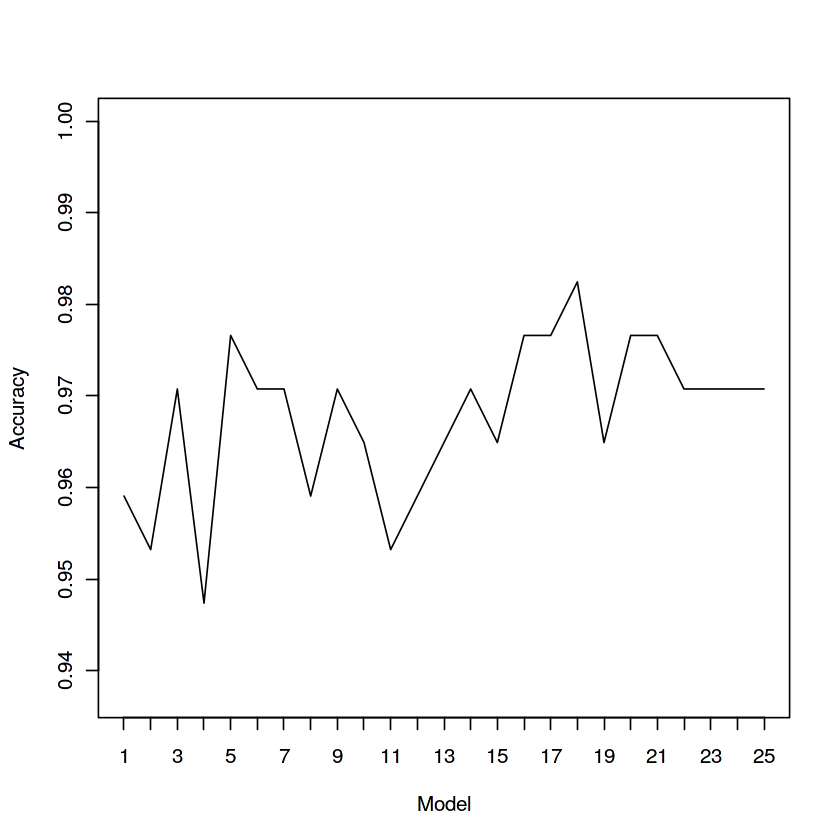

In [12]:
#set up a list to store the performance of the models
performance_nnet_list <- list()

#in a loop for each model calculate the confusion matrix and extract the accuracy of each model
for(size_use in 1:25){
    performance_nnet_list[[size_use]]  <- confusionMatrix(
            data      = as.factor(pred_nnet_list[[size_use]]),
            reference = test_scaled$diagnosis,
            positive  = "M",
            dnn       = c("predicted","actual")
            )
    }

# extract the accuracy of the models
accuracy_nnet <- unlist(
    lapply(
        lapply(
            performance_nnet_list ,
            "[[" ,
            "overall"
            ),
        "[[",
        "Accuracy")
        )

#lets try to plot the accuracy for the 25 models
plot(
  accuracy_nnet, #vector of accuracies
  ylim=c(min(accuracy_nnet)-0.01,1), #range of y-axis
  xlab="Model", #label of x-axis
  ylab="Accuracy", #label of y-axis
  type="l", #line plot instead of points
  xaxt="n" #remove x tick labels we can add our own
  )

#add our own x tick labels
axis(1, #x axis, 2 is y axis
     at=1:25, #positions 1 to 25
     labels=1:25 #label them with 1 to 25 only
     )

#model(s) with highest accuracy
which(accuracy_nnet==max(accuracy_nnet))

<h3>Part 4d: Neural Network | Sensitivity Analysis</h3>

rel_imp variable 
 
 fractal_dimension_worst 0.07146494 fractal_dimension_worst 
 compactness_se 0.06030277 compactness_se 
 texture_worst 0.05941808 texture_worst 
 radius_se 0.05479945 radius_se 
 area_se 0.04921995 area_se 
 concavity_mean 0.04715165 concavity_mean 
 area_worst 0.04226448 area_worst 
 radius_worst 0.04080139 radius_worst 
 perimeter_worst 0.04008443 perimeter_worst 
 concave.points_se 0.03627505 concave.points_se 
 symmetry_mean 0.03368205 symmetry_mean 
 smoothness_worst 0.03296243 smoothness_worst 
 texture_se 0.03249893 texture_se 
 symmetry_worst 0.03091328 symmetry_worst 
 compactness_mean 0.03043718 compactness_mean 
 texture_mean 0.02989981 texture_mean 
 smoothness_se 0.02833369 smoothness_se 
 fractal_dimension_se 0.02774882 fractal_dimension_se 
 concave.points_mean 0.02589665 concave.points_mean 
 perimeter_se 0.02455502 perimeter_se 
 symmetry_se 0.02423276 symmetry_se 
 compactness_worst 0.02348785 compactness_worst 
 smoothness_mean 0.02342914 smoothness_mean 
 fractal_dimension_mean 0.02271288 fractal_dimension_mean 
 concavity_worst 0.02215374 concavity_worst 
 radius_mean 0.01913261 radius_mean 
 perimeter_mean 0.01881607 perimeter_mean 
 concave.points_worst 0.01872796 concave.points_worst 
 area_mean 0.01600735 area_mean 
 concavity_se 0.01258958 concavity_se

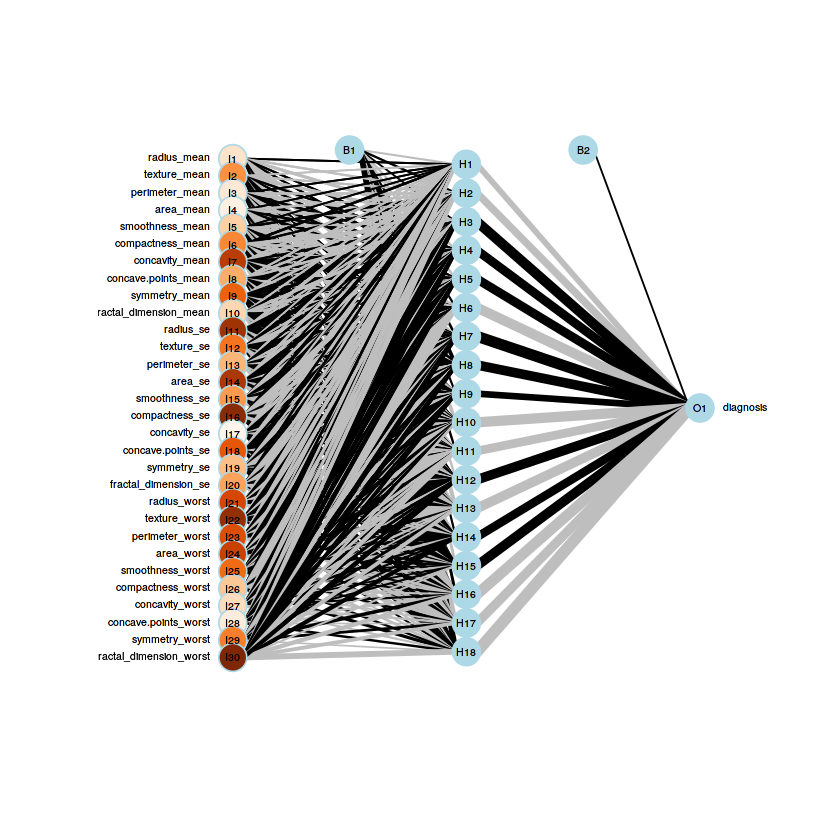

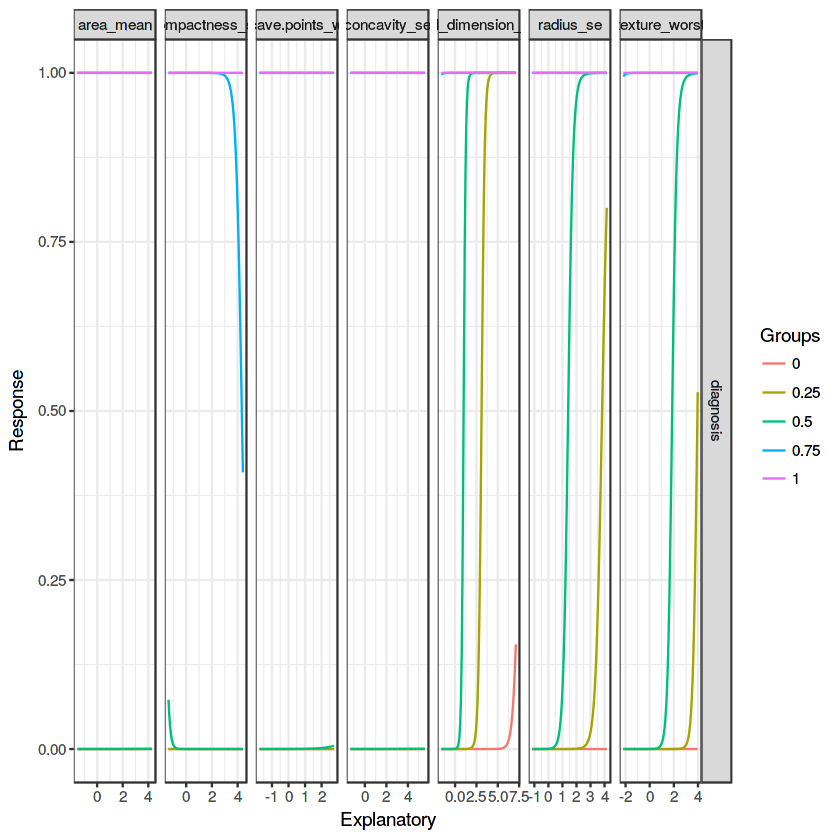

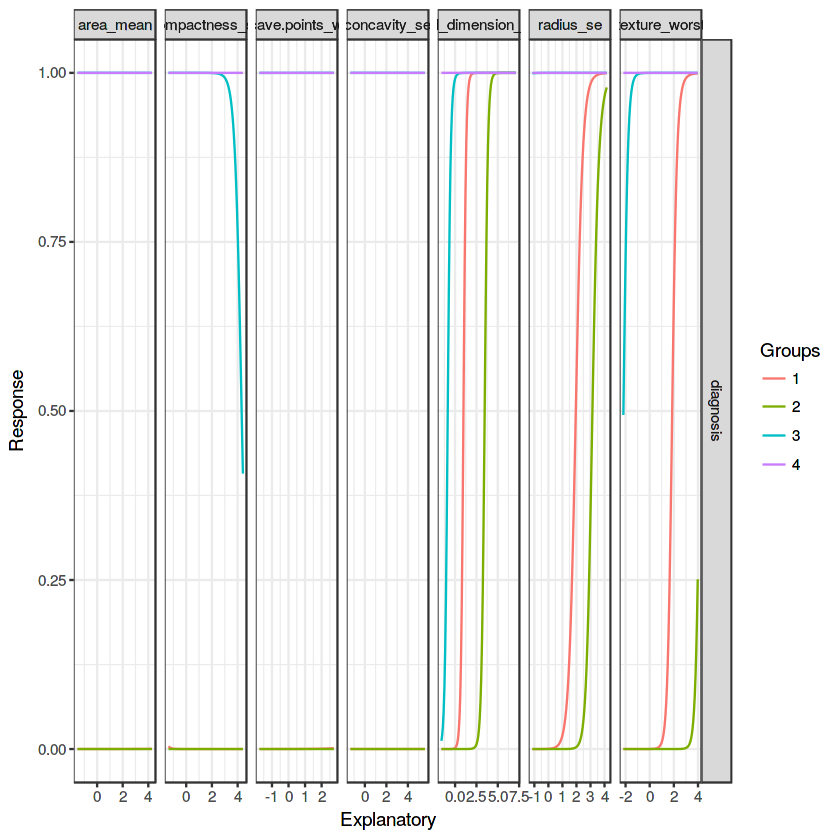

In [13]:
#select model that you would like to do sensitivity analysis on
model_number <- 18

#calculate the relative importance of the inputs in model using Garson's method
rel_imp_nnet <- garson(#Garson's method of calculating importance
        model_nnet_list[[model_number]],
        bar_plot = FALSE
       )

# set colour of input nodes based on their relative importance
cols <- colorRampPalette(brewer.pal(9,"Oranges"))(30)[rank(rel_imp_nnet)]

# plot network
plotnet(
    model_nnet_list[[model_number]],
    cex_val    = 0.5,
    circle_cex = 3,
    circle_col = list(cols, 'lightblue'),
    max_sp     = TRUE
    );

# Take a look at the relative importance values for each input variable, the variables have been sorted from highest to lowest relative importance.
rel_imp_nnet$variable <- row.names(rel_imp_nnet);
rel_imp_sorted <- rel_imp_nnet[order(rel_imp_nnet$rel_imp, decreasing = TRUE),]
rel_imp_sorted

# Lets profile the the top 4 variables with highest relative importance values as well as the variable with the lowest variable importance value. That is, let us see the relationship of each variable on the response.

#choose variables to analyse
plot_variables <- rel_imp_sorted$variable[c(1:4, 28:30)]

# profile each variable while holding all others at quantiles ranging from 0 to 1
lekprofile(
    model_nnet_list[[model_number]],
    xsel       = plot_variables,
    group_vals = seq(0, 1, by = 0.25),
    grp_nms    = seq(0, 1, by = 0.25)
    )

# Since covariance among the predictors can create unlikely scenarios if one holds all the other variables at the same value, one can use kmeans clustering to find natural clusters of variables and hold each variable in the cluster at a constant value equal to the mean of the cluster

#profile each variable while holding all others at the means of each cluster
lekprofile(
    model_nnet_list[[model_number]],
    xsel       = plot_variables,
    group_vals = 4
    )
